In [1]:
!ls

drive  sample_data


In [2]:
import pandas as pd
import numpy as np

from fastai.vision import *
from fastai.metrics import accuracy

from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize
import re

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/iMaterialist_Train_2000.csv')
valid_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/valid500.csv')

In [4]:
train_data.dropna()
valid_data.dropna()

,file_path,labels
0,/content/drive/My Drive/valid500_images/54a392...,Dance Wear;Purple;White;Black;Female;U-Necks;S...
1,/content/drive/My Drive/valid500_images/540ea6...,Bikinis;Female;Strapless;Multi Color;Sweethear...
2,/content/drive/My Drive/valid500_images/5800ab...,Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...
3,/content/drive/My Drive/valid500_images/5a0fcb...,Swimsuits;Female;Peach;White;Nylon;Stripes
4,/content/drive/My Drive/valid500_images/5921db...,Polos;Male;Collared;Short Sleeves;Gray;Black;C...
...,...,...
495,/content/drive/My Drive/valid500_images/544876...,Costumes & Cosplay;Female;Sleeveless;Red;White...
496,/content/drive/My Drive/valid500_images/543fff...,Pullover Sweaters;Male;Round Neck;Long Sleeved...
497,/content/drive/My Drive/valid500_images/540f17...,Athletic Sets;Female;Round Neck;Long Sleeved;G...
498,/content/drive/My Drive/valid500_images/557eba...,Suits & Blazers;Male;Long Sleeved;Black;White;...


In [5]:
train_data['path'] = train_data['file_path'].apply(lambda x: str(x).replace('/content/drive/My Drive/', ''))
train_data.head()

,file_path,labels,path
0,/content/drive/My Drive/iMaterialist2000/538eb...,Dress Shirts;Green;Pink;Female;Collared;Long S...,iMaterialist2000/538eb83d7360462e2a799417-larg...
1,/content/drive/My Drive/iMaterialist2000/55362...,Shorts;Female;Denim;Ripped,iMaterialist2000/553620b8d57a010c1d38645c-larg...
2,/content/drive/My Drive/iMaterialist2000/59538...,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...,iMaterialist2000/595388b61bb25874af2789a2-larg...
3,/content/drive/My Drive/iMaterialist2000/59ab9...,Costumes & Cosplay;Neutral;Round Neck;Short Sl...,iMaterialist2000/59ab99620b18267c7f60d726-larg...
4,/content/drive/My Drive/iMaterialist2000/55519...,T-Shirts;White;Female;Cotton;Round Neck;Short ...,iMaterialist2000/55519d27f486251be84cac64-larg...


In [6]:
train_data.drop(['file_path'], axis = 1, inplace = True)
train_data.head()

,labels,path
0,Dress Shirts;Green;Pink;Female;Collared;Long S...,iMaterialist2000/538eb83d7360462e2a799417-larg...
1,Shorts;Female;Denim;Ripped,iMaterialist2000/553620b8d57a010c1d38645c-larg...
2,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...,iMaterialist2000/595388b61bb25874af2789a2-larg...
3,Costumes & Cosplay;Neutral;Round Neck;Short Sl...,iMaterialist2000/59ab99620b18267c7f60d726-larg...
4,T-Shirts;White;Female;Cotton;Round Neck;Short ...,iMaterialist2000/55519d27f486251be84cac64-larg...


In [7]:
valid_data['path'] = valid_data['file_path'].apply(lambda x: str(x).replace('/content/drive/My Drive/', ''))
valid_data.drop(['file_path'], axis = 1, inplace = True)
valid_data.head()

,labels,path
0,Dance Wear;Purple;White;Black;Female;U-Necks;S...,valid500_images/54a392283b64454816a70f1c-large...
1,Bikinis;Female;Strapless;Multi Color;Sweethear...,valid500_images/540ea6081d2d431f274b5932-large...
2,Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...,valid500_images/5800ab5b2fbe17229fed2c86-large...
3,Swimsuits;Female;Peach;White;Nylon;Stripes,valid500_images/5a0fcb50591d3a2b57454eff-large...
4,Polos;Male;Collared;Short Sleeves;Gray;Black;C...,valid500_images/5921db0a1772f241e67031ef-large...


In [ ]:
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/model_trainEAST.csv', index = False)
valid_data.to_csv('/content/drive/MyDrive/Colab Notebooks/model_validEast.csv', index = False)

In [8]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [9]:
train_list = ImageList.from_df(train_data[['path', 'labels']], path=Path('/content/drive/My Drive/Colab Notebooks/EAST/'))
valid_list = ImageList.from_df(valid_data[['path', 'labels']], path=Path('/content/drive/My Drive/Colab Notebooks/EAST/'))

In [10]:
train_list

ImageList (2000 items)
Image (3, 405, 410),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: /content/drive/My Drive/Colab Notebooks/EAST

In [11]:
valid_list

ImageList (500 items)
Image (3, 600, 555),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: /content/drive/My Drive/Colab Notebooks/EAST

In [12]:
sd = train_list.split_by_list(train = train_list, valid = valid_list)  

In [13]:
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
data = (sd.label_from_df(label_delim=';')                        #telling the model where the labels come from
          .transform(tfms=tfms, size = 224)                      #performing transforms on dataset
          .databunch(bs=32)                                      # create the dataloader and databunch in 1 go
          .normalize(imagenet_stats))     

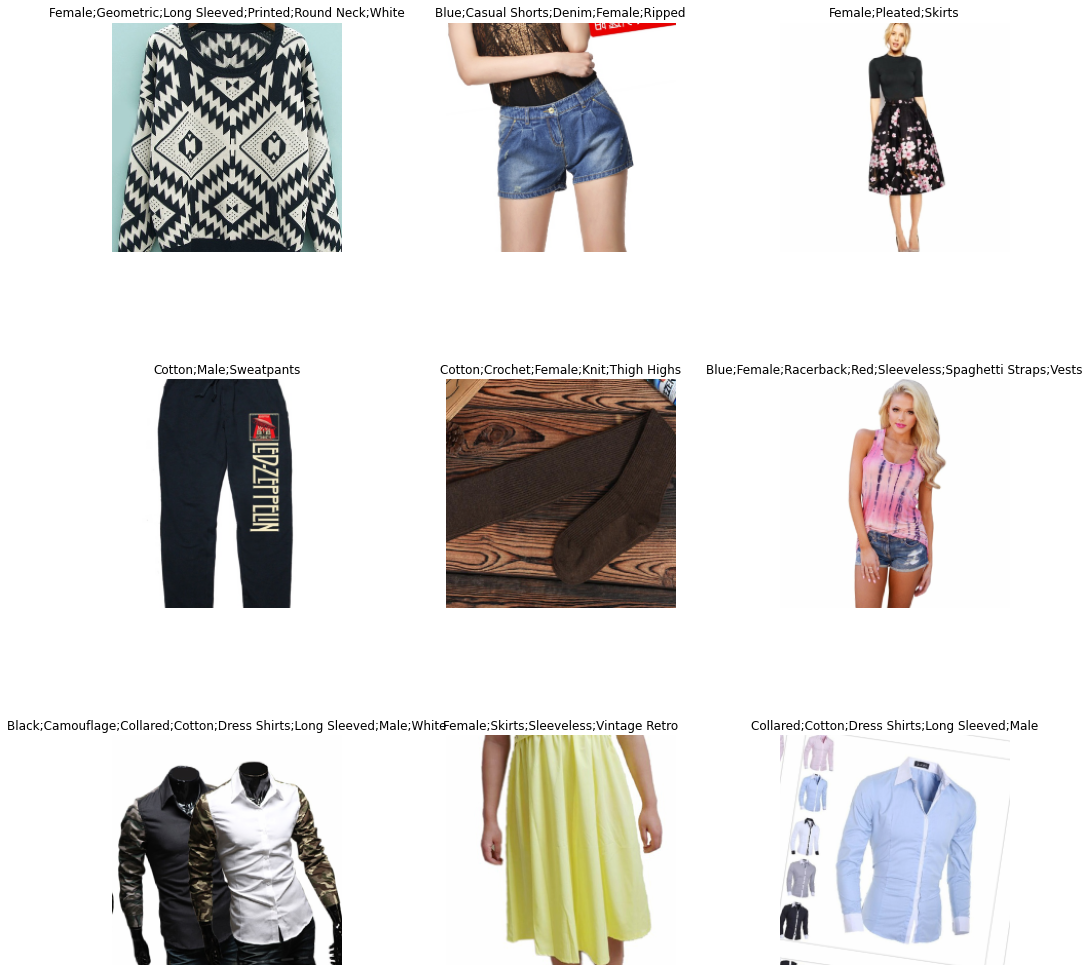

In [14]:
data.show_batch(rows=3, figsize=(15,15))

In [15]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Dress Shirts;Green;Pink;Female;Collared;Long Sleeved,Shorts;Female;Denim;Ripped,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;Female;Sleeveless;Pleated,Costumes & Cosplay;Neutral;Round Neck;Short Sleeves;Vintage Retro,T-Shirts;White;Female;Cotton;Round Neck;Short Sleeves;Printed
Path: /content/drive/My Drive/Colab Notebooks/EAST;

Valid: LabelList (500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Dance Wear;Purple;White;Black;Female;U-Necks;Short Sleeves;Polyester;Stripes;Vintage Retro,Bikinis;Female;Strapless;Multi Color;Sweetheart Neckline;Spandex;Nylon;Floral;Bandeaus;Bandage;Printed,Sweatpants;Black;Gray;Short Sleeves;Neutral;Cotton;Rayon,Swimsuits;Female;Peach;White;Nylon;Stripes,Polos;Male;Collared;Short Slee

In [ ]:
dir(data)

In [17]:
data.label_list

LabelLists;

Train: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Dress Shirts;Green;Pink;Female;Collared;Long Sleeved,Shorts;Female;Denim;Ripped,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;Female;Sleeveless;Pleated,Costumes & Cosplay;Neutral;Round Neck;Short Sleeves;Vintage Retro,T-Shirts;White;Female;Cotton;Round Neck;Short Sleeves;Printed
Path: /content/drive/My Drive/Colab Notebooks/EAST;

Valid: LabelList (500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Dance Wear;Purple;White;Black;Female;U-Necks;Short Sleeves;Polyester;Stripes;Vintage Retro,Bikinis;Female;Strapless;Multi Color;Sweetheart Neckline;Spandex;Nylon;Floral;Bandeaus;Bandage;Printed,Sweatpants;Black;Gray;Short Sleeves;Neutral;Cotton;Rayon,Swimsuits;Female;Peach;White;Nylon;Stripes,Polos;Male;Collared;Short Sleeves;

In [18]:
data.classes

['Asymmetric',
 'Athletic Pants',
 'Athletic Sets',
 'Athletic Shirts',
 'Athletic Shorts',
 'Backless Dresses',
 'Baggy Jeans',
 'Bandage',
 'Bandeaus',
 'Batwing Tops',
 'Beaded',
 'Beige',
 'Bikinis',
 'Black',
 'Blouses',
 'Blue',
 'Bodycon',
 'Bodysuits',
 'Boots',
 'Brown',
 'Bubble Coats',
 'Business Shoes',
 'Camouflage',
 'Canvas',
 'Capes & Capelets',
 'Capri Pants',
 'Cardigans',
 'Cargo Pants',
 'Cargo Shorts',
 'Cashmere',
 'Casual Dresses',
 'Casual Pants',
 'Casual Shirts',
 'Casual Shoes',
 'Casual Shorts',
 'Checkered',
 'Chevron',
 'Chiffon',
 'Clear',
 'Clubbing Dresses',
 'Cocktail Dresses',
 'Collared',
 'Corsets',
 'Costumes & Cosplay',
 'Cotton',
 'Criss Cross',
 'Crochet',
 'Crop Tops',
 'Custom Made Clothing',
 'Dance Wear',
 'Denim',
 'Drawstring Pants',
 'Dress Shirts',
 'Dresses',
 'Embroidered',
 'Fashion Sets',
 'Faux Fur',
 'Female',
 'Flannel',
 'Fleece',
 'Floral',
 'Formal Dresses',
 'Fringe',
 'Furry',
 'Galaxy',
 'Geometric',
 'Gold',
 'Gray',
 'Gree

In [20]:
#ps = PorterStemmer()
classes = [label for label in data.classes]
print(classes)

['Asymmetric', 'Athletic Pants', 'Athletic Sets', 'Athletic Shirts', 'Athletic Shorts', 'Backless Dresses', 'Baggy Jeans', 'Bandage', 'Bandeaus', 'Batwing Tops', 'Beaded', 'Beige', 'Bikinis', 'Black', 'Blouses', 'Blue', 'Bodycon', 'Bodysuits', 'Boots', 'Brown', 'Bubble Coats', 'Business Shoes', 'Camouflage', 'Canvas', 'Capes & Capelets', 'Capri Pants', 'Cardigans', 'Cargo Pants', 'Cargo Shorts', 'Cashmere', 'Casual Dresses', 'Casual Pants', 'Casual Shirts', 'Casual Shoes', 'Casual Shorts', 'Checkered', 'Chevron', 'Chiffon', 'Clear', 'Clubbing Dresses', 'Cocktail Dresses', 'Collared', 'Corsets', 'Costumes & Cosplay', 'Cotton', 'Criss Cross', 'Crochet', 'Crop Tops', 'Custom Made Clothing', 'Dance Wear', 'Denim', 'Drawstring Pants', 'Dress Shirts', 'Dresses', 'Embroidered', 'Fashion Sets', 'Faux Fur', 'Female', 'Flannel', 'Fleece', 'Floral', 'Formal Dresses', 'Fringe', 'Furry', 'Galaxy', 'Geometric', 'Gold', 'Gray', 'Green', 'Halter Tops', 'Harem Pants', 'Hearts', 'Hollow-Out', 'Hoodies &

In [21]:
snow = SnowballStemmer("english")

In [ ]:
ps.stem('pants')

'pant'

In [23]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [25]:
snow.stem('v-necks') in words.words()

False

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:
lemmatizer.lemmatize('athletic') in words.words()

True

In [28]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [30]:
#splitting text and removing punctuations
prep_classes = []
for label in classes:
  split_label = word_tokenize(label)
  #print(split_label)
  for text in split_label:
    #print(text)
    if text not in prep_classes:
      stemmed = snow.stem(text.lower())
      #print(stemmed)
      lemma = lemmatizer.lemmatize(text.lower())
      #print(lemma)
      if stemmed in words.words():
        prep_classes.append(stemmed)
      elif lemma in words.words():
        prep_classes.append(lemma)
      else:
        prep_classes.append(text.lower())

In [31]:
print(classes)
print(prep_classes)

['Asymmetric', 'Athletic Pants', 'Athletic Sets', 'Athletic Shirts', 'Athletic Shorts', 'Backless Dresses', 'Baggy Jeans', 'Bandage', 'Bandeaus', 'Batwing Tops', 'Beaded', 'Beige', 'Bikinis', 'Black', 'Blouses', 'Blue', 'Bodycon', 'Bodysuits', 'Boots', 'Brown', 'Bubble Coats', 'Business Shoes', 'Camouflage', 'Canvas', 'Capes & Capelets', 'Capri Pants', 'Cardigans', 'Cargo Pants', 'Cargo Shorts', 'Cashmere', 'Casual Dresses', 'Casual Pants', 'Casual Shirts', 'Casual Shoes', 'Casual Shorts', 'Checkered', 'Chevron', 'Chiffon', 'Clear', 'Clubbing Dresses', 'Cocktail Dresses', 'Collared', 'Corsets', 'Costumes & Cosplay', 'Cotton', 'Criss Cross', 'Crochet', 'Crop Tops', 'Custom Made Clothing', 'Dance Wear', 'Denim', 'Drawstring Pants', 'Dress Shirts', 'Dresses', 'Embroidered', 'Fashion Sets', 'Faux Fur', 'Female', 'Flannel', 'Fleece', 'Floral', 'Formal Dresses', 'Fringe', 'Furry', 'Galaxy', 'Geometric', 'Gold', 'Gray', 'Green', 'Halter Tops', 'Harem Pants', 'Hearts', 'Hollow-Out', 'Hoodies &

In [32]:
'athletic' in prep_classes

True

In [33]:
snow.stem('assymetric')

'assymetr'

In [34]:
snow.stem('assymetric') in words.words()

False

In [35]:
lemmatizer.lemmatize('assymetric')

'assymetric'

In [36]:
lemmatizer.lemmatize('athletic') in words.words()

True

In [ ]:
for label in classes:
  split_label = word_tokenize(label)
  for text in split_label:
    print(text)

Asymmetric
Athletic
Pants
Athletic
Sets
Athletic
Shirts
Athletic
Shorts
Backless
Dresses
Baggy
Jeans
Bandage
Bandeaus
Batwing
Tops
Beaded
Beige
Bikinis
Black
Blouses
Blue
Bodycon
Bodysuits
Boots
Brown
Bubble
Coats
Business
Shoes
Camouflage
Canvas
Capes
&
Capelets
Capri
Pants
Cardigans
Cargo
Pants
Cargo
Shorts
Cashmere
Casual
Dresses
Casual
Pants
Casual
Shirts
Casual
Shoes
Casual
Shorts
Checkered
Chevron
Chiffon
Clear
Clubbing
Dresses
Cocktail
Dresses
Collared
Corsets
Costumes
&
Cosplay
Cotton
Criss
Cross
Crochet
Crop
Tops
Custom
Made
Clothing
Dance
Wear
Denim
Drawstring
Pants
Dress
Shirts
Dresses
Embroidered
Fashion
Sets
Faux
Fur
Female
Flannel
Fleece
Floral
Formal
Dresses
Fringe
Furry
Galaxy
Geometric
Gold
Gray
Green
Halter
Tops
Harem
Pants
Hearts
Hollow-Out
Hoodies
&
Sweatshirts
Hosiery
,
Stockings
,
Tights
Houndstooth
Jackets
Jeans
Jerseys
Jilbaab
Jumpsuits
Overalls
&
Rompers
Kimonos
Knit
Lace
Leather
Leggings
Leopard
And
Cheetah
Linen
Lingerie
Sleepwear
&
Underwear
Long
Sleeved
Mal

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/df.csv', header = 0)
df.head()

,0,1,2,3
0,asymmetric,black,Dance;Wear;Black;Female;Shoulder;Drapes;Sleeve...,1
1,asymmetric,black,Casual;Dresses;Blue;Green;Teal;Black;Red;Femal...,1
2,asymmetric,black,Black;White;Yellow;Red;Female;V;Necks;Long;Sle...,1
3,asymmetric,black,Black;Female;Chiffon;Shoulder;Drapes;Ruched;Lo...,1
4,asymmetric,black,Casual;Dresses;Blue;Black;Female;V;Necks;Ruche...,1


In [38]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/df1.csv', header = 0)
df1.head()

,0,1,2
0,asymmetric,black,7
1,asymmetric,blouses,1
2,asymmetric,blue,3
3,asymmetric,chiffon,11
4,asymmetric,cotton,1


In [134]:
list(set(df1['word_2'].tolist()))

['undershirts',
 'thongs',
 'checkered',
 'jilbaab',
 'linen',
 'slippers',
 'chevron',
 'canvas',
 'jerseys',
 'blue',
 'collared',
 'underwear',
 'brown',
 'rayon',
 'suede',
 'pink',
 'chiffon',
 'peach',
 'maternity',
 'crochet',
 'shorts',
 'neoprene',
 'fleece',
 'lace',
 'polyester',
 'raincoats',
 'cotton',
 'stripes',
 'zebra',
 'polos',
 'gold',
 'beaded',
 'cashmere',
 'knit',
 'sequins',
 'plush',
 'jackets',
 'bandeaus',
 'clear',
 'galaxy',
 'red',
 'dresses',
 'bandage',
 'quilted',
 'yellow',
 'tunic',
 'bodycon',
 'racerback',
 'mesh',
 'flannel',
 'vests',
 'black',
 'pleated',
 'beige',
 'kimonos',
 'summer',
 'female',
 'peacoats',
 'bikinis',
 'sleeveless',
 'wool',
 'turtlenecks',
 'trousers',
 'floral',
 'green',
 'ripped',
 'swimsuits',
 'skirts',
 'orange',
 'leggings',
 'male',
 'peplum',
 'plaid',
 'patent',
 'tweed',
 'uniforms',
 'purple',
 'camouflage',
 'denim',
 'houndstooth',
 'reversible',
 'blouses',
 'pajamas',
 'printed',
 'paisley',
 'strapless',
 

In [61]:
df1.rename(columns = {'0': 'word_1', '1': 'word_2', '2': 'comb_frequency'}, inplace=True)
df1.head()

,word_1,word_2,comb_frequency
0,asymmetric,black,7
1,asymmetric,blouses,1
2,asymmetric,blue,3
3,asymmetric,chiffon,11
4,asymmetric,cotton,1


In [39]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/df2.csv', header = 0)
df2.head()

,0,1,2,3,4
0,asymmetric,black,blue,Casual;Dresses;Blue;Green;Teal;Black;Red;Femal...,1
1,asymmetric,black,blue,Casual;Dresses;Blue;Black;Female;V;Necks;Ruche...,1
2,asymmetric,black,blue,Casual;Dresses;Blue;Black;Red;Female;Chiffon;S...,1
3,asymmetric,black,chiffon,Casual;Dresses;Blue;Green;Teal;Black;Red;Femal...,1
4,asymmetric,black,chiffon,Black;Female;Chiffon;Shoulder;Drapes;Ruched;Lo...,1


In [40]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_tag_embedder/Dataset/csvfiles/df3.csv', header= 0)
df3.head()

,0,1,2,3
0,asymmetric,black,blue,2
1,asymmetric,black,chiffon,2
2,asymmetric,black,dresses,4
3,asymmetric,black,female,7
4,asymmetric,black,green,1


In [62]:
df3.rename(columns = {'0': 'word_1', '1': 'word_2', '2': 'word_3', '3': 'comb_frequency'}, inplace=True)
df3.head()

,word_1,word_2,word_3,comb_frequency
0,asymmetric,black,blue,2
1,asymmetric,black,chiffon,2
2,asymmetric,black,dresses,4
3,asymmetric,black,female,7
4,asymmetric,black,green,1


In [57]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
dir(widgets)

['Accordion',
 'AppLayout',
 'Audio',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'ButtonStyle',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Combobox',
 'Controller',
 'CoreWidget',
 'DOMWidget',
 'DatePicker',
 'Datetime',
 'Dropdown',
 'FileUpload',
 'FloatLogSlider',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'GridBox',
 'GridspecLayout',
 'HBox',
 'HTML',
 'HTMLMath',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Layout',
 'NumberFormat',
 'Output',
 'Password',
 'Play',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionRangeSlider',
 'SelectionSlider',
 'SliderStyle',
 'Style',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'ToggleButtonsStyle',
 'TwoByTwoLayout',
 'VBox',
 'Valid',
 'ValueWidget',
 'Video',
 'Widget',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__jupyter_widgets_base_version__',
 '__jupyter_widgets_controls_version__',
 '__

In [115]:
search = widgets.Text(value = 'Search')
display(search.value)

'Search'

In [69]:
suggested_tag_1 = widgets.ToggleButton(
    value=False,
    description='Blue',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
suggested_tags

ToggleButton(value=False, button_style='success', description='Blue', icon='check', tooltip='Description')

In [126]:
dir(search_button)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_click_handlers',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_button_msg',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_re

In [199]:
trial1 = widgets.ToggleButton(
    value=False,
    description='Blue',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
trial1

ToggleButton(value=False, button_style='success', description='Blue', icon='check', tooltip='Description')

In [ ]:
dir(trial1)

In [193]:
trial = widgets.ToggleButtons(
    options = ['blue', 'chiffon']
)
trial

ToggleButtons(options=('blue', 'chiffon'), value='blue')

In [224]:
dir(trial)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_initializing_traits_',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_options_full',
 '_options_labels',
 '_options_values',
 '_propagate_index',
 '_propa

In [243]:
toggle = widgets.ToggleButton(description='click me')

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))

def fun(obj):
  with out:
    if obj['new']:
      print(type(obj))
      print(obj['new'])  
      display('asd')
    else:
      out.clear_output()

toggle.observe(fun, 'value')
display(toggle)
display(out)

ToggleButton(value=False, description='click me')

Output(layout=Layout(border='1px solid black'))

In [244]:
dir(toggle)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_repr_keys',
 '_send',
 '_should_send_property

In [210]:
d = {}
d['1'] = '1'
print(d)
print(d['1'])

{'1': '1'}
1


In [112]:
type(search.value)

str

In [245]:
def retrieve_suggestions(query_word = []):
  #print(type(query_word))
  nwords_passed = len(query_word)
  #print(nwords_passed)
  #print(query_word)
  suggested_list = []
  if (nwords_passed > 0):
    if (nwords_passed == 1):
      word_combination = df1[(df1['word_1'] == query_word[0]) | (df1['word_2'] == query_word[0])]
      word_combination.head()
      suggested_words = word_combination.nlargest(5, ['comb_frequency'])
      #print(suggested_words.head())
      #print(word_combination.shape)
      #print(word_combination.head())
      suggested_list = suggested_words['word_1'].tolist()
      #print('word_1:', suggested_list)
      suggested_list = suggested_list + suggested_words['word_2'].tolist()
      #print('word_1 + word_2:', suggested_list)
      suggested_list = set(suggested_list)
      suggested_list = list(suggested_list)
      #print('reduced list:', suggested_list)
      #print(suggested_list)
      for word in query_word:
        if word in suggested_list:
                  suggested_list.remove(word)
  return suggested_list

In [255]:
def create_togglebuttons(suggested_list = []):
  toggle_tags = {}
  for tag in suggested_list:
    toggle = widgets.ToggleButton(
        value=False,
        description=tag,
        disabled=False,
        button_style='success', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Description',
        icon='check' # (FontAwesome names without the `fa-` prefix)
    )
    toggle_tags[tag] = toggle
    #toggle_tags[tag].observe(toggle, 'value')
    #display(toggle_tags[tag])
  return toggle_tags

In [253]:
def display_tags(tags = {}):
  for k, v in tags.items():
    display(v)

In [267]:
def observe_toggle(tags):
  for k,v in tags.items():
    def toggle(obj):
      if obj['new']:
        print(type(obj))
        search_input.value=v.description
    v.observe(toggle, 'value')


In [268]:
search_input = widgets.Text(value = 'Search')

search_button = widgets.Button(
    description = 'Search'
)

tags = {}
suggested = []
query = []

def suggest(b):
  #print([search_input.value])
  query.append(search_input.value)
  suggested_list = retrieve_suggestions(query)
  #print(suggested_list)
  #suggested_tags = widgets.ToggleButtons(
      #options = suggested_list
  #)
  tags = create_togglebuttons(suggested_list) 
  display_tags(tags)
  #tags = toggle_tags
  #print(tags) 
  suggested = suggested_list
  observe_toggle(tags)

search_button.on_click(suggest)



display(search_input, search_button)

Text(value='Search')

Button(description='Search', style=ButtonStyle())

ToggleButton(value=False, button_style='success', description='black', icon='check', tooltip='Description')

ToggleButton(value=False, button_style='success', description='female', icon='check', tooltip='Description')

ToggleButton(value=False, button_style='success', description='red', icon='check', tooltip='Description')

<class 'traitlets.utils.bunch.Bunch'>
<class 'traitlets.utils.bunch.Bunch'>


In [251]:
suggested

[]

In [177]:
def suggest(b):
  print(search_input.value)
search_button.on_click(suggest)

In [ ]:

def value_changed(change):
    # change.new contains the new value
    print('new value: ' + change['new'])

search_input.on_submit(value_changed)
suggested_tags.options = []

def suggest_on_click(button):
  #print(button.on_displayed)
  print(type(search_input.value))
  print(search_input)
  suggested_list = retrieve_suggestions([search_input.value])
  print(suggested_list)
  suggested_tags.options = suggested_list
  display(search, search_button, suggested_tags)

search_button.on_click(suggest_on_click)
display(search, search_button, suggested_tags)

In [162]:
@search_button.on_click
def suggest_on_click(query_word = search_input.value):
  suggested_list = retieve_suggestions(query_word)
  suggested_tags.options = suggested_list

#widgets.interact(suggest_on_click, query_words=search.value)

In [159]:
word_combination = df1[(df1['word_1'] == query_word[0]) | (df1['word_2'] == query_word[0])]
suggested_words = word_combination.nlargest(3, ['comb_frequency'])
suggested_words.head()

,word_1,word_2,comb_frequency
608,chiffon,female,141
1023,female,chiffon,141
606,chiffon,dresses,73


In [160]:
#query_word = ['chiffon']
def retrieve_suggestions(query_word = []):
  print(type(query_word))
  nwords_passed = len(query_word)
  print(nwords_passed)
  print(query_word)
  suggested_list = []
  if (nwords_passed > 0):
    if (nwords_passed == 1):
      word_combination = df1[(df1['word_1'] == query_word[0]) | (df1['word_2'] == query_word[0])]
      suggested_words = word_combination.nlargest(3, ['comb_frequency'])
      suggested_words.head()
      suggested_list = suggested_words['word_1'].tolist()
      suggested_list = suggested_list + suggested_words['word_2'].tolist()
      suggested_list = set(suggested_list)
      suggested_list = list(suggested_list)
      print(suggested_list)
      for word in query_word:
        if word in suggested_list:
                  suggested_list.remove(word)
  return suggested_list